In [6]:
import pprint
pp = pprint.PrettyPrinter(indent=4, width=200, depth=None, stream=None, compact=False, sort_dicts=False)

In [1]:
from tensorflow.keras.applications import EfficientNetV2B1
model = EfficientNetV2B1(include_top=False, pooling='avg', weights='imagenet')
model.trainable = False

In [2]:
print(model.get_layer('avg_pool'))

In [3]:
model.summary()

Model: "efficientnetv2-b1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   0           ['rescaling[0][0]']              
                                3)                                                

In [2]:
from keras.models import Model
my_model= Model(inputs=model.input, outputs=model.get_layer('avg_pool').output)

In [19]:
my_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   0           ['rescaling[0][0]']              
                                3)                                                            

input image shape: (1, 240, 240, 3)


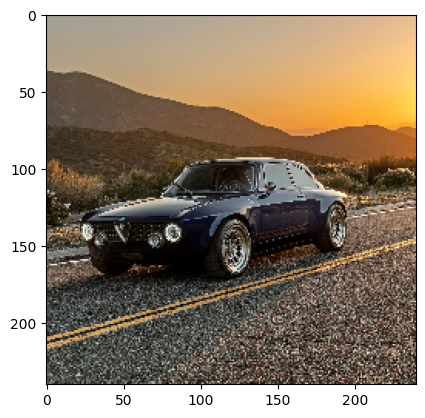

In [3]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions, preprocess_input

img_path='img.jpg'
my_img=imread(img_path)
#imshow(my_img)

SIZE = 240

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h = SIZE # img.shape[0] - h - fixed
w = round(img.shape[1]*(h/img.shape[0])) # keeps the ratio
new_img = cv2.resize(img, (w,h))
w_start=round((w-h)/2)
w_end=w_start+SIZE
crop_img = new_img[0:SIZE, w_start:w_end]
imshow(crop_img)

x = np.expand_dims(crop_img,axis=0)
x = preprocess_input(x)

print('input image shape:', x.shape)

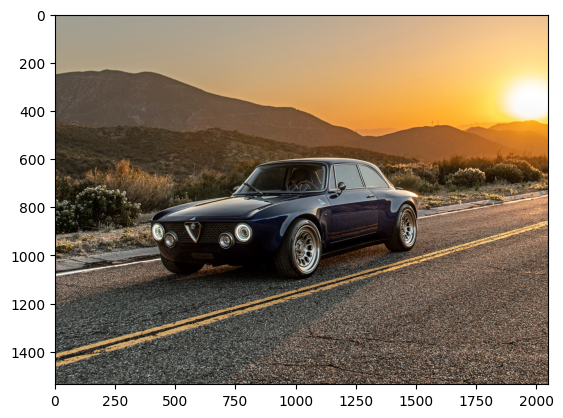

In [5]:
img_path='img.jpg'
my_img=imread(img_path)
imshow(my_img)

In [4]:
outputs = my_model(my_img)

In [8]:
pp.pprint(outputs)

(1, 1280)
<tf.Tensor: shape=(1, 1280), dtype=float32, numpy=
array([[-0.10916453,  0.12894857, -0.17182744, ..., -0.01356702,
         0.02901877, -0.09974062]], dtype=float32)>
